# **Klasifikasi Risiko Diabetes Menggunakan Logistic Regression dan Random Forest**

Diabetes merupakan penyakit kronis yang dapat dicegah atau dikendalikan dengan deteksi dini berdasarkan gaya hidup dan faktor kesehatan individu. Proyek ini bertujuan membangun model prediksi risiko diabetes menggunakan data kesehatan dan perilaku pasien.

### Problem Statement:
- Bagaimana mengklasifikasikan individu ke dalam kategori memiliki diabetes atau tidak berdasarkan fitur kesehatan dan perilaku?

### Solution Statement:
- Menggunakan dua pendekatan machine learning:
  1. **Logistic Regression** sebagai model baseline yang mudah diinterpretasikan.
  2. **Random Forest** sebagai model lanjutan yang mampu menangkap pola non-linear dan interaksi antar fitur.

### Sumber Dataset:
- Dataset Diabetes diperoleh dari Kaggle dan memiliki lebih dari 500 sampel serta beragam fitur kesehatan dan gaya hidup.


## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


## **Load Data dan Statistik Deskriptif**
Membaca data, mengecek null values, dan menaganlisis statistik deskriptif. Dataset yang digunakan berisi informasi kesehatan dan kebiasaan gaya hidup dari individu dewasa. Setiap baris mewakili satu responden, dengan label target berupa apakah mereka mengidap diabetes (Diabetes = 1) atau tidak (Diabetes = 0).

In [2]:
df = pd.read_csv('diabetes_data.csv')
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

**Interpretasi:**

*   Total kolom: 17 (16 fitur + 1 target)
*   Semua kolom bertipe numerik (float64)
*   Tidak ditemukan nilai null atau kosong, artinya dataset siap diproses tanpa perlu imputasi data.



In [4]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


**Analisis:**
1. Data terdiri dari 70.692 responden tanpa ada nilai kosong. Mayoritas berasal dari kelompok usia lanjut, dengan rata-rata kategori usia di angka 8.6 (sekitar 60–64 tahun). Rasio pria dan wanita cukup seimbang, meskipun sedikit lebih banyak wanita (±54%).
2, Rata-rata BMI berada di angka 29.8, mendekati kategori obesitas ringan. Sekitar 47% responden memiliki riwayat merokok, 70% cukup aktif secara fisik, dan lebih dari separuh rutin mengonsumsi buah dan sayuran setiap hari.
3. Untuk kondisi kesehatan, 52% memiliki kolesterol tinggi dan 56% menderita hipertensi. Sebagian kecil mengalami penyakit jantung (14%) atau stroke (6%). Hampir seluruh responden (97%) pernah melakukan pemeriksaan kolesterol dalam lima tahun terakhir.
4. Sebanyak 25% mengalami kesulitan berjalan dan rata-rata penilaian terhadap kesehatan umum berada di level “cukup baik” (rata-rata 2.8 dari skala 1–5).
5. Label target (Diabetes) terdistribusi seimbang, menjadikan data ini ideal untuk klasifikasi biner.

# **Visualisasi Data (EDA)**

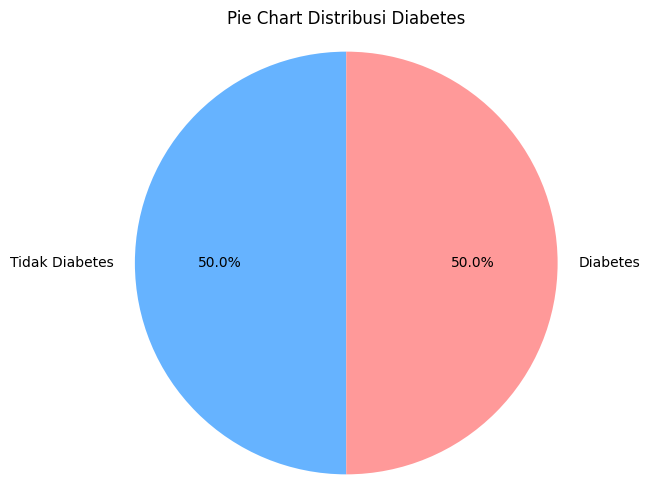

In [11]:
diabetes_counts = df['Diabetes'].value_counts()
labels = ['Tidak Diabetes', 'Diabetes']
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Pie Chart Distribusi Diabetes')
plt.axis('equal')
plt.show()

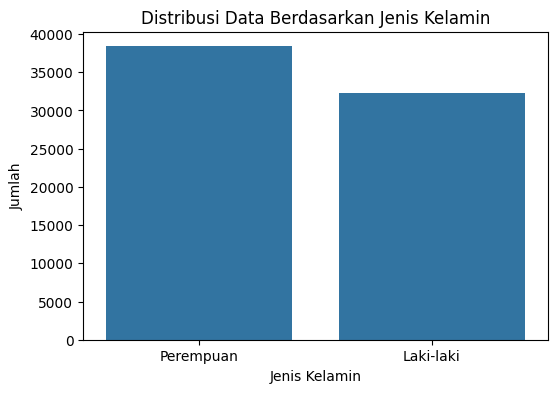

In [8]:
# Bar Chart untuk Distribusi Berdasarkan Jenis Kelamin
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Distribusi Data Berdasarkan Jenis Kelamin')
plt.xticks([0, 1], ['Perempuan', 'Laki-laki'])
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kelamin')
plt.show()

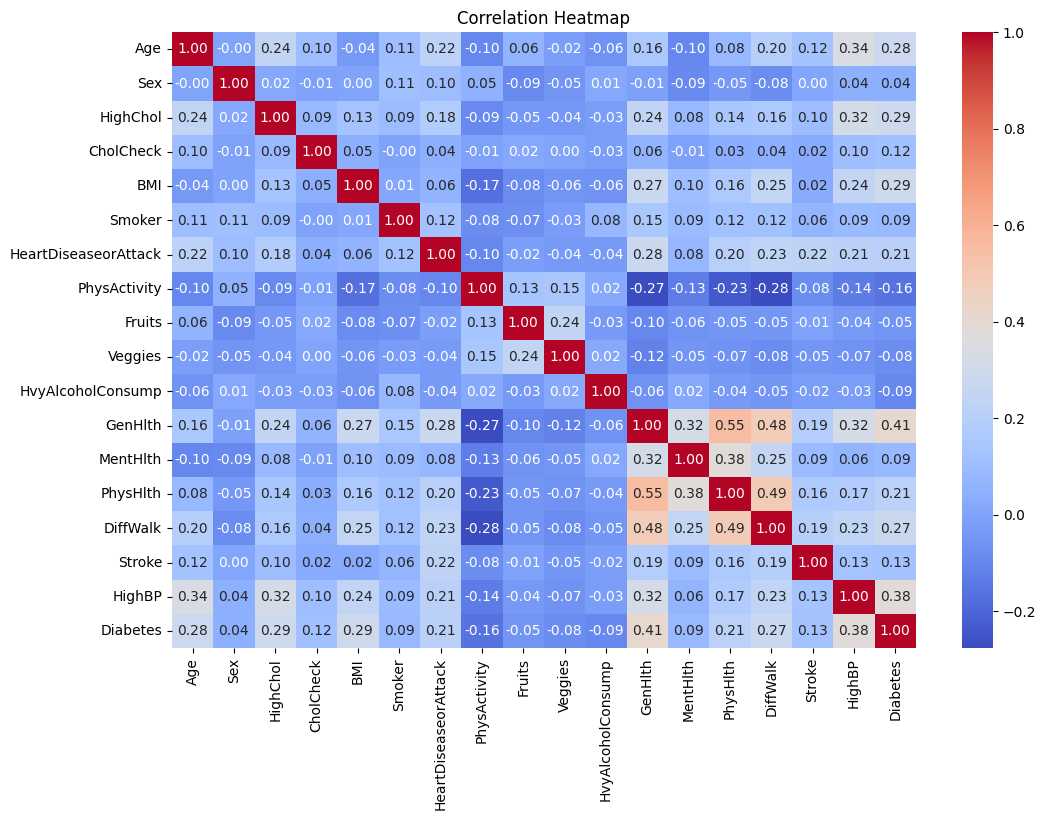

In [6]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Insight EDA

1. Distribusi target `Diabetes` cukup seimbang, masing-masing 50% antara penderita dan non-penderita.

2. Dari sisi jenis kelamin, jumlah perempuan sedikit lebih banyak (54%) dibanding laki-laki (46%). Namun, korelasi antara jenis kelamin dan diabetes sangat rendah (0.04), sehingga tidak terlalu berpengaruh dalam prediksi.

3. Beberapa fitur memiliki hubungan cukup kuat dengan risiko diabetes. Yang paling menonjol adalah kondisi kesehatan umum (`GenHlth`, korelasi 0.41), hipertensi (0.38), kolesterol tinggi (0.32), BMI (0.29), dan usia (0.28). Artinya, semakin buruk kondisi kesehatan seseorang dan semakin tinggi tekanan darah atau berat badannya, makin besar kemungkinan ia mengidap diabetes.

4. Sebaliknya, aktivitas fisik menunjukkan korelasi negatif (-0.14) meski lemah.


## **Normalisasi Data dan Split Data**


In [53]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**Insight:**
Data telah dipisahkan antara fitur (X) dan target (y). Semua fitur dinormalisasi agar berada dalam skala yang sama, terutama untuk menghindari bias pada algoritma yang sensitif terhadap skala seperti Logistic Regression. Data kemudian dibagi dengan rasio 70:30 untuk pelatihan dan pengujian.

## **Membangun Model**
1. Model Logistic Regression dibangun menggunakan objek `LogisticRegression()` dari scikit-learn. Data yang sudah dinormalisasi digunakan sebagai input, dan model dilatih menggunakan data training untuk memprediksi dua kelas: diabetes atau tidak.
2. Model Random Forest dibangun dengan `RandomForestClassifier()` dan menggunakan parameter yang sudah dituning. Model ini dilatih pada data yang sama untuk membandingkan hasilnya dengan Logistic Regression.


In [54]:
# Logistic Regression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [62]:
# Membangun dan melatih Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=50
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


## **Insight**

Dua model digunakan untuk klasifikasi risiko diabetes berdasarkan data gaya hidup dan kondisi kesehatan.

### Logistic Regression:
Model ini dibangun untuk mengenali pola linear antara fitur (seperti tekanan darah, BMI, usia) dengan kemungkinan diabetes.  
Model dilatih dengan:
- Fungsi aktivasi sigmoid (default untuk klasifikasi biner),
- Loss: `log loss` (implisit dalam `LogisticRegression()`),
- Optimizer: metode gradien bawaan dari solver `'lbfgs'`,
- Parameter `class_weight='balanced'` untuk menangani kemungkinan ketidakseimbangan kelas.

### Random Forest:
Model ini digunakan untuk menangkap hubungan non-linear dan interaksi antar fitur.  
Struktur model terdiri dari:
- 200 pohon keputusan (estimators),
- Maksimum kedalaman pohon: 15,
- Minimal 5 data per split dan 2 data per daun (leaf),
- Parameter `class_weight='balanced'` agar adil terhadap kedua kelas.

Kedua model dilatih menggunakan data yang telah dinormalisasi dan dibagi 70:30 untuk pelatihan dan pengujian. Tujuannya adalah membandingkan pendekatan sederhana (LR) dengan pendekatan yang lebih fleksibel dan kompleks (RF) dalam memprediksi risiko diabetes.


## **Evaluasi Model**
Evaluasi Model menggunakan precision, recall, f1-score, dan confusion matrix.

In [55]:
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10601
         1.0       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



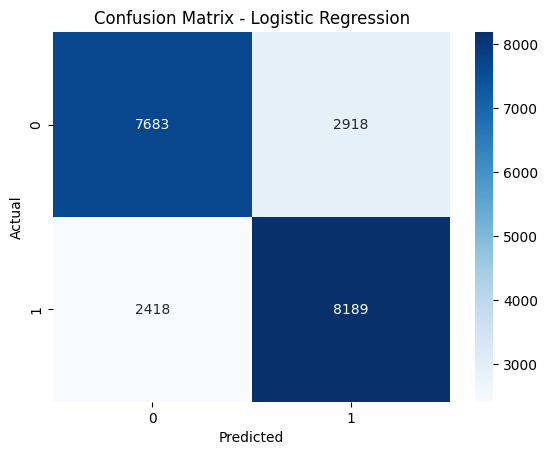

In [56]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [63]:
print("Classification Report - Random Forest (Fitur Berkorelasi Tinggi)")
print(classification_report(y_test, y_pred))

Classification Report - Random Forest (Fitur Berkorelasi Tinggi)
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     10601
         1.0       0.73      0.80      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



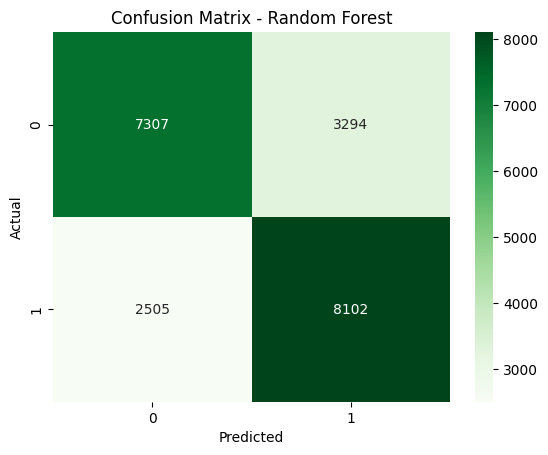

In [61]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Insight Evaluasi Model**:
Kedua model — Logistic Regression dan Random Forest — sama-sama menghasilkan akurasi sebesar 75%. Namun, ada perbedaan dalam cara keduanya mengenali kasus diabetes.

Logistic Regression lebih seimbang, dengan recall 77% untuk kasus diabetes dan precision 74%. Ini menunjukkan model cukup baik dalam mengenali penderita diabetes tanpa terlalu banyak salah prediksi.

Sementara itu, Random Forest memiliki recall yang lebih tinggi untuk kelas diabetes (80%), artinya model ini lebih agresif dalam mendeteksi kasus positif. Namun, hal ini dibayar dengan penurunan presisi dan lebih banyak salah prediksi untuk kelas non-diabetes.

Secara umum, Random Forest lebih cocok jika prioritas utamanya adalah mendeteksi sebanyak mungkin kasus diabetes, meskipun ada risiko lebih tinggi memprediksi orang sehat sebagai sakit. Logistic Regression lebih cocok jika dibutuhkan hasil yang lebih stabil dan seimbang antar kelas.

# **Kesimpulan**

Model klasifikasi risiko diabetes berhasil dibuat menggunakan dua pendekatan: Logistic Regression dan Random Forest. Keduanya dilatih menggunakan data kesehatan dan gaya hidup, seperti usia, tekanan darah, BMI, dan kondisi umum responden.

Beberapa hal penting dari proyek ini:

- Kedua model sama-sama menghasilkan **akurasi sekitar 75%** pada data uji.
- **Logistic Regression** memberi hasil yang cukup seimbang antara mendeteksi dan membedakan penderita serta non-penderita diabetes.
- **Random Forest** cenderung lebih agresif dalam mengenali kasus diabetes, dengan recall yang lebih tinggi (80%), meskipun sedikit menurunkan presisi.
- Confusion matrix menunjukkan bahwa kedua model bekerja dengan cukup baik, meskipun pendekatannya berbeda. Logistic Regression memberikan hasil yang lebih seimbang antar kelas, sedangkan Random Forest lebih fokus dalam mendeteksi kasus diabetes dengan recall yang lebih tinggi.
- Model ini menunjukkan bahwa data sederhana pun bisa digunakan untuk mendeteksi risiko diabetes dengan cukup baik.

Ke depan, model masih bisa ditingkatkan lewat:
- Penambahan fitur yang lebih relevan seperti riwayat keluarga atau pola makan, agar informasi yang digunakan lebih lengkap,
- Penyesuaian parameter model (tuning) untuk mengoptimalkan akurasi dan mengurangi kesalahan prediksi,
- Uji coba dengan model lain seperti XGBoost yang umumnya lebih unggul dalam menangani data tabular dan kompleksitas fitur.
